# Encoder / Decoder

<img src="img/encoder-decoder.png" style="width: 95%; margin-left: auto; margin-right: auto;"/>

# Transformer

<img src="img/transformer.png" style="width: 45%; margin-left: auto; margin-right: auto;"/>

## Multi-Head Attention

<img src="img/multi-head-attention.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

## Scaled Dot-Product Attention

<img src="img/scaled-dot-prod-attention.png" style="width: 30%; margin-left: auto; margin-right: auto;"/>

In [1]:
!nvidia-smi

Wed Oct  7 00:14:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 450.66       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  TITAN RTX           Off  | 00000000:01:00.0 Off |                  N/A |
| 41%   45C    P8    20W / 280W |    181MiB / 24217MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  TITAN RTX           Off  | 00000000:21:00.0 Off |                  N/A |
| 40%   

In [2]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

In [3]:
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

In [4]:
ids = tokenizer.encode('This is an example of text, and')
ids

[1212, 318, 281, 1672, 286, 2420, 11, 290]

In [5]:
tokenizer.decode(ids)

'This is an example of text, and'

In [6]:
import torch

In [7]:
t = torch.LongTensor(ids).unsqueeze(0)
preds = model.generate(t)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [8]:
preds.shape, preds[0]

(torch.Size([1, 20]),
 tensor([1212,  318,  281, 1672,  286, 2420,   11,  290,  340,  338,  407,  257,
          922,  530,   13,  198,  198,  464,  717, 1517]))

In [9]:
tokenizer.decode(preds[0].numpy())

"This is an example of text, and it's not a good one.\n\nThe first thing"

In [10]:
preds[:, -10:]

tensor([[ 407,  257,  922,  530,   13,  198,  198,  464,  717, 1517]])

In [11]:
preds2 = model.generate(preds[:, -10:])

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [12]:
torch.cat((preds[0, :-10], preds2[0]))

tensor([1212,  318,  281, 1672,  286, 2420,   11,  290,  340,  338,  407,  257,
         922,  530,   13,  198,  198,  464,  717, 1517,  314, 6810,  373,  326,
         262,  366,   40, 1101,  407,  257])

In [13]:
tokenizer.decode(torch.cat((preds[0, :-10], preds2[0])).numpy())

'This is an example of text, and it\'s not a good one.\n\nThe first thing I noticed was that the "I\'m not a'

In [14]:
from fastai.text.all import *

In [15]:
path = untar_data(URLs.WIKITEXT_TINY)
path.ls()

(#2) [Path('/home/tc/.fastai/data/wikitext-2/test.csv'),Path('/home/tc/.fastai/data/wikitext-2/train.csv')]

In [16]:
df_train = pd.read_csv(path/'train.csv', header=None)
df_valid = pd.read_csv(path/'test.csv', header=None)
df_train.head()

,0
0,"\n = 2013 – 14 York City F.C. season = \n \n The 2013 – 14 season was the <unk> season of competitive association football and 77th season in the Football League played by York City Football Club , a professional football club based in York , North Yorkshire , England . Their 17th @-@ place finish in 2012 – 13 meant it was their second consecutive season in League Two . The season ran from 1 July 2013 to 30 June 2014 . \n Nigel Worthington , starting his first full season as York manager , made eight permanent summer signings . By the turn of the year York were only above the relegation z..."
1,"\n = Big Boy ( song ) = \n \n "" Big Boy "" <unk> "" I 'm A Big Boy Now "" was the first single ever recorded by the Jackson 5 , which was released by Steeltown Records in January 1968 . The group played instruments on many of their Steeltown compositions , including "" Big Boy "" . The song was neither a critical nor commercial success , but the Jackson family were delighted with the outcome nonetheless . \n The Jackson 5 would release a second single with Steeltown Records before moving to Motown Records . The group 's recordings at Steeltown Records were thought to be lost , but they were re..."
2,"\n = The Remix ( Lady Gaga album ) = \n \n The Remix is a remix album by American recording artist Lady Gaga . Released in Japan on March 3 , 2010 , it contains remixes of the songs from her first studio album , The Fame ( 2008 ) , and her third extended play , The Fame Monster ( 2009 ) . A revised version of the track list was prepared for release in additional markets , beginning with Mexico on May 3 , 2010 . A number of recording artists have produced the songs , including Pet Shop Boys , Passion Pit and The Sound of Arrows . The remixed versions feature both uptempo and <unk> composit..."
3,"\n = New Year 's Eve ( Up All Night ) = \n \n "" New Year 's Eve "" is the twelfth episode of the first season of the American comedy television series Up All Night . The episode originally aired on NBC in the United States on January 12 , 2012 . It was written by Erica <unk> and was directed by Beth McCarthy @-@ Miller . The episode also featured a guest appearance from Jason Lee as Chris and Reagan 's neighbor and Ava 's boyfriend , Kevin . \n During Reagan ( Christina Applegate ) and Chris 's ( Will <unk> ) first New Year 's Eve game night , Reagan 's competitiveness comes out causing Ch..."
4,"\n = Geopyxis carbonaria = \n \n Geopyxis carbonaria is a species of fungus in the genus Geopyxis , family <unk> . First described to science in 1805 , and given its current name in 1889 , the species is commonly known as the charcoal loving elf @-@ cup , dwarf <unk> cup , <unk> <unk> cup , or pixie cup . The small , <unk> @-@ shaped fruitbodies of the fungus are reddish @-@ brown with a whitish fringe and measure up to 2 cm ( 0 @.@ 8 in ) across . They have a short , tapered stalk . Fruitbodies are commonly found on soil where brush has recently been burned , sometimes in great numbers ...."


In [17]:
all_texts = np.concatenate([df_train[0].values, df_valid[0].values])

In [18]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x):
        return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [19]:
splits = [range_of(df_train), list(range(len(df_train), len(all_texts)))]
tfmd_lists = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [20]:
tfmd_lists.train[0],tfmd_lists.valid[0]

(tensor([220, 198, 796,  ..., 198, 220, 198]),
 tensor([220, 198, 796,  ..., 198, 220, 198]))

In [21]:
tfmd_lists.tfms(tfmd_lists.train.items[0]).shape, tfmd_lists.tfms(tfmd_lists.valid.items[0]).shape

(torch.Size([4576]), torch.Size([1485]))

In [27]:
batch_size, seq_len = 6, 1024
dls = tfmd_lists.dataloaders(bs=batch_size, seq_len=seq_len)

In [28]:
dls.show_batch(max_n=2)

,text,text_
0,"\n = St Mary's Church, Rhodogeidio = \n \n St Mary's Church, Rhodogeidio is a small medieval church, dating from the 15th century, near <unk> @-@ y @-@ <unk>, in Anglesey, north Wales. It served as a chapel of ease to another church in the area, St <unk>'s. Some restoration work was carried out in the 19th century, but St Mary's has since fallen into disuse and is now largely in ruins. \n It is a Grade II listed building, a national designation given to "" buildings of special interest, which warrant every effort being made to preserve them "", in particular because it is "" a late Medieval church of exceptionally simple character "", and is virtually unaltered despite its poor condition. One writer has said that St Mary's "" has the distinction of probably being the most isolated church in Anglesey "". \n \n = = History","\n = St Mary's Church, Rhodogeidio = \n \n St Mary's Church, Rhodogeidio is a small medieval church, dating from the 15th century, near <unk> @-@ y @-@ <unk>, in Anglesey, north Wales. It served as a chapel of ease to another church in the area, St <unk>'s. Some restoration work was carried out in the 19th century, but St Mary's has since fallen into disuse and is now largely in ruins. \n It is a Grade II listed building, a national designation given to "" buildings of special interest, which warrant every effort being made to preserve them "", in particular because it is "" a late Medieval church of exceptionally simple character "", and is virtually unaltered despite its poor condition. One writer has said that St Mary's "" has the distinction of probably being the most isolated church in Anglesey "". \n \n = = History and"
1,"be a dangerous opponent if threatened with frustration "". His charm offensives were often condemned as being <unk>. During excavations, he was known as an authoritarian leader, but favoured those whom he thought exhibited bravery by standing up to his authority. Hence, he has been termed "" a benevolent dictator "". He was meticulous in his writings, and would repeatedly revise and rewrite both pieces for publication and personal letters. Throughout his life, he was a heavy smoker. \n Wheeler expressed the view that he was "" the least political of mortals "". Despite not taking a strong interest in politics, Wheeler was described by his biographer as "" a natural conservative "" ; for instance, during his youth he was strongly critical of the <unk> and their cause of greater legal rights for women. Nevertheless, he was "" usually happy to advance young women professionally "", something that","a dangerous opponent if threatened with frustration "". His charm offensives were often condemned as being <unk>. During excavations, he was known as an authoritarian leader, but favoured those whom he thought exhibited bravery by standing up to his authority. Hence, he has been termed "" a benevolent dictator "". He was meticulous in his writings, and would repeatedly revise and rewrite both pieces for publication and personal letters. Throughout his life, he was a heavy smoker. \n Wheeler expressed the view that he was "" the least political of mortals "". Despite not taking a strong interest in politics, Wheeler was described by his biographer as "" a natural conservative "" ; for instance, during his youth he was strongly critical of the <unk> and their cause of greater legal rights for women. Nevertheless, he was "" usually happy to advance young women professionally "", something that may"


In [29]:
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

In [31]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        return x if isinstance(x, Tensor) else tokenize(x)
    def decodes(self, x):
        return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [34]:
tfmd_lists = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls = tfmd_lists.dataloaders(bs=batch_size, seq_len=seq_len)

In [35]:
dls.show_batch(max_n=2)

,text,text_
0,"\n = Van Morrison : Too Late to Stop Now = \n \n Van Morrison : Too Late to Stop Now is a biography of musician Van Morrison, written by Steve Turner. It was first published in 1993 in the United States by Penguin Group, and in Great Britain by Bloomsbury Publishing. Turner first met Van Morrison in 1985 ; he interviewed approximately 40 people that knew the subject in his research for the biography. Van Morrison did not think positively of the biography, and multiple newspapers reported he attempted to purchase all of the book's 25 @,@ 000 copies. He sent a letter to the author asserting the 40 individuals interviewed for the book were not his friends, and accused Turner of "" <unk> distortions and <unk> about me personally "". \n The biography takes a pictorial format, and includes many photographs of Van Morrison and scenes relating","\n = Van Morrison : Too Late to Stop Now = \n \n Van Morrison : Too Late to Stop Now is a biography of musician Van Morrison, written by Steve Turner. It was first published in 1993 in the United States by Penguin Group, and in Great Britain by Bloomsbury Publishing. Turner first met Van Morrison in 1985 ; he interviewed approximately 40 people that knew the subject in his research for the biography. Van Morrison did not think positively of the biography, and multiple newspapers reported he attempted to purchase all of the book's 25 @,@ 000 copies. He sent a letter to the author asserting the 40 individuals interviewed for the book were not his friends, and accused Turner of "" <unk> distortions and <unk> about me personally "". \n The biography takes a pictorial format, and includes many photographs of Van Morrison and scenes relating to"
1,"freeway was opened in November 2004. The first phase of construction was completed in asphalt, while the second and third phases were built in concrete. The project was built with two firsts : the first single @-@ point urban interchange ( <unk> ; / <unk> / ) in Michigan, and a new technique to apply the pavement markings, <unk> them into the concrete to reduce the chance of a <unk> scraping them off. In advance of the opening of the freeway to traffic, the Michigan Department of Transportation ( MDOT ) allowed the public to walk or bike the South Beltline in an open @-@ house event called the "" <unk> Shuffle "". \n \n = = Route description = = \n \n M @-@ 6 starts at exit 64 on I @-@ 196 in Ottawa County near Hudsonville. The freeway runs southeast from the interchange through the rural","was opened in November 2004. The first phase of construction was completed in asphalt, while the second and third phases were built in concrete. The project was built with two firsts : the first single @-@ point urban interchange ( <unk> ; / <unk> / ) in Michigan, and a new technique to apply the pavement markings, <unk> them into the concrete to reduce the chance of a <unk> scraping them off. In advance of the opening of the freeway to traffic, the Michigan Department of Transportation ( MDOT ) allowed the public to walk or bike the South Beltline in an open @-@ house event called the "" <unk> Shuffle "". \n \n = = Route description = = \n \n M @-@ 6 starts at exit 64 on I @-@ 196 in Ottawa County near Hudsonville. The freeway runs southeast from the interchange through the rural Georgetown"


In [36]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [37]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [38]:
learn.validate()

(#2) [3.263556480407715,26.14234733581543]

SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=0.0002754228771664202)

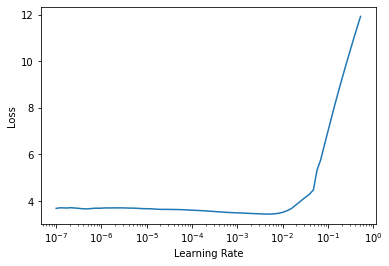

In [39]:
learn.lr_find()

In [40]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,9.134309,7.387218,1615.206299,02:39


In [41]:
df_valid.head(1)

,0
0,"\n = Tropical Storm <unk> ( 2008 ) = \n \n Tropical Storm <unk> was the tenth tropical storm of the 2008 Atlantic hurricane season . <unk> developed out of a strong tropical wave which moved off the African coast on August 31 . The wave quickly became organized and was declared Tropical Depression Ten while located 170 mi ( 270 km ) to the south @-@ southeast of the Cape Verde Islands on September 2 . The depression was quickly upgraded to Tropical Storm <unk> around noon the same day . Over the next several days , <unk> moved in a general west @-@ northwest direction and reached its peak..."


In [42]:
prompt = "\n = Unicorn = \n \n A unicorn is a magical creature with a rainbow tail and a horn"